In [2]:
from IPython.display import display, HTML, Markdown

display(Markdown("# LOAD DATASET"))

# LOAD DATASET

In [3]:
import pandas as pd

df = pd.read_csv(
    "tokopedia_product_reviews_2025.csv",
    engine="python",
    on_bad_lines="skip"
)

df.head()


,review_text,review_date,review_id,product_name,product_category,product_variant,product_price,product_url,product_id,rating,sold_count,shop_id,sentiment_label
0,baru sekali ini terima brg dr belanja online d...,2024-12-22,1134256160,Telur Ayam Kampung Asli - Telur Mengandung Ome...,Makanan & Minuman,Box Polos,87000,https://www.tokopedia.com/indofarmproduct/telu...,4601033481,5,1000000,8672687,positive
1,cocok bgt aku sama telur nya. nga Amis menurut...,2025-02-25,1242584634,Telur Ayam Kampung Asli - Telur Mengandung Ome...,Makanan & Minuman,Box Polos,87000,https://www.tokopedia.com/indofarmproduct/telu...,4601033481,5,1000000,8672687,positive
2,Telornya sudah sampai di rumah dengan kemasan ...,2025-07-15,1573444677,Telur Ayam Kampung Asli - Telur Mengandung Ome...,Makanan & Minuman,Box Polos,87000,https://www.tokopedia.com/indofarmproduct/telu...,4601033481,5,1000000,8672687,positive
3,Telor sudah diterima dengan baik dan tidak ada...,2025-07-20,1581728541,Telur Ayam Kampung Asli - Telur Mengandung Ome...,Makanan & Minuman,Box Polos,87000,https://www.tokopedia.com/indofarmproduct/telu...,4601033481,5,1000000,8672687,positive
4,"Alhamdulillah penjual amanah,Telor nya terbaik...",2023-04-24,881041355,Telur Ayam Kampung Asli - Telur Mengandung Ome...,Makanan & Minuman,Box Full Design,87000,https://www.tokopedia.com/indofarmproduct/telu...,4601033481,5,1000000,8672687,positive


In [4]:
display(Markdown("# COLUMN VIEW"))

# COLUMN VIEW

In [5]:
df.columns

Index(['review_text', 'review_date', 'review_id', 'product_name',
       'product_category', 'product_variant', 'product_price', 'product_url',
       'product_id', 'rating', 'sold_count', 'shop_id', 'sentiment_label'],
      dtype='object')

In [6]:
display(Markdown("# COLUMN SELECTION & DROP MISSING"))

# COLUMN SELECTION & DROP MISSING

In [7]:
df = df[['review_text', 'rating']]
df = df.dropna()

df.head()

,review_text,rating
0,baru sekali ini terima brg dr belanja online d...,5
1,cocok bgt aku sama telur nya. nga Amis menurut...,5
2,Telornya sudah sampai di rumah dengan kemasan ...,5
3,Telor sudah diterima dengan baik dan tidak ada...,5
4,"Alhamdulillah penjual amanah,Telor nya terbaik...",5


In [8]:
display(Markdown("# SENTIMENT LABEL"))

# SENTIMENT LABEL

In [9]:
# buang rating netral
df = df[df['rating'] != 3]

# buat sentiment dari rating
df['sentiment'] = df['rating'].apply(
    lambda x: 'positive' if x >= 4 else 'negative'
)

df[['rating', 'sentiment']].head()

,rating,sentiment
0,5,positive
1,5,positive
2,5,positive
3,5,positive
4,5,positive


In [10]:
display(Markdown("# VIEW SENTIMENT DISTRIBUTION"))

# VIEW SENTIMENT DISTRIBUTION

In [11]:
df['sentiment'].value_counts()

sentiment
positive    63943
negative      798
Name: count, dtype: int64

In [12]:
display(Markdown("# BALANCE DATASET"))

# BALANCE DATASET

In [13]:
min_count = df['sentiment'].value_counts().min()

df_balanced = df.groupby('sentiment').sample(
    n=min_count,
    random_state=42
)

df_balanced['sentiment'].value_counts()

sentiment
negative    798
positive    798
Name: count, dtype: int64

In [14]:
display(Markdown("# CLEAN TEXT (BALANCED DATASET)"))

# CLEAN TEXT (BALANCED DATASET)

In [15]:
import re
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

nltk.download('punkt')

stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords]
    return " ".join(tokens)

df['clean_review'] = df['review_text'].apply(clean_text)

df[['review_text', 'clean_review']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rianv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review_text,clean_review
0,baru sekali ini terima brg dr belanja online d...,baru sekali terima brg dr belanja online dg pa...
1,cocok bgt aku sama telur nya. nga Amis menurut...,cocok bgt aku sama telur nya nga amis menurutk...
2,Telornya sudah sampai di rumah dengan kemasan ...,telornya rumah kemasan sangat rapi luar biasa ...
3,Telor sudah diterima dengan baik dan tidak ada...,telor diterima baik pecah terimakasih buat sel...
4,"Alhamdulillah penjual amanah,Telor nya terbaik...",alhamdulillah penjual amanah telor nya terbaik...


In [16]:
display(Markdown("# CLEAN TEXT (RAW DATASET)"))

# CLEAN TEXT (RAW DATASET)

In [17]:
df_balanced['clean_review'] = df_balanced['review_text'].apply(clean_text)

df_balanced[['review_text', 'clean_review']].head()

,review_text,clean_review
57910,Tolong jangan di beli di tokoh ini lagi pesana...,jangan beli tokoh pesanan sesuai
57190,"Barang bagus, tapi size kekecilan, dan tidak b...",barang bagus size kekecilan tukar
4466,"layanan toko sacks, minta pengiriman instant t...",layanan toko sacks minta pengiriman instant tp...
50773,Pesanan tdk di antar sesuai alamat..pesanan di...,pesanan tdk antar sesuai alamat pesanan ambil ...
4563,Alhamdulillah sampai meskipun telat 3hari dan ...,alhamdulillah meskipun telat hari ternyata ben...


In [18]:
display(Markdown("# CLEAN TEXT (BALANCED DATASET)"))

# CLEAN TEXT (BALANCED DATASET)

In [19]:
df_balanced = df_balanced.copy()
df_balanced['clean_review'] = df_balanced['review_text'].apply(clean_text)

In [20]:
display(Markdown("# TF-IDF VECTORIZATION"))

# TF-IDF VECTORIZATION

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X = vectorizer.fit_transform(df_balanced['clean_review'])
y = df_balanced['sentiment']

In [22]:
display(Markdown("# SPLIT TRAIN TEST"))

# SPLIT TRAIN TEST

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [24]:
display(Markdown("# TRAIN LOGISTIC REGRESSION"))

# TRAIN LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [26]:
display(Markdown("# MODEL EVALUATION"))

# MODEL EVALUATION

In [27]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.93      0.89       160
    positive       0.92      0.85      0.88       160

    accuracy                           0.89       320
   macro avg       0.89      0.89      0.89       320
weighted avg       0.89      0.89      0.89       320



In [28]:
display(Markdown("# SAVE MODEL"))

# SAVE MODEL

In [29]:
import joblib

joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [30]:
display(Markdown("# NEW REVIEW PREDICTION FUNCTION"))

# NEW REVIEW PREDICTION FUNCTION

In [31]:
def predict_sentiment(text):
    text_clean = clean_text(text)
    vector = vectorizer.transform([text_clean])
    return model.predict(vector)[0]

In [32]:
display(Markdown("# NEW REVIEW TEST"))

# NEW REVIEW TEST

In [33]:
predict_sentiment("Barangnya bagus dan pengiriman cepat")

'positive'

In [34]:
predict_sentiment("barang jelek dan tidak sesuai")

'negative'

In [39]:
display(Markdown("# BAR CHART VISUAL"))

# BAR CHART VISUAL

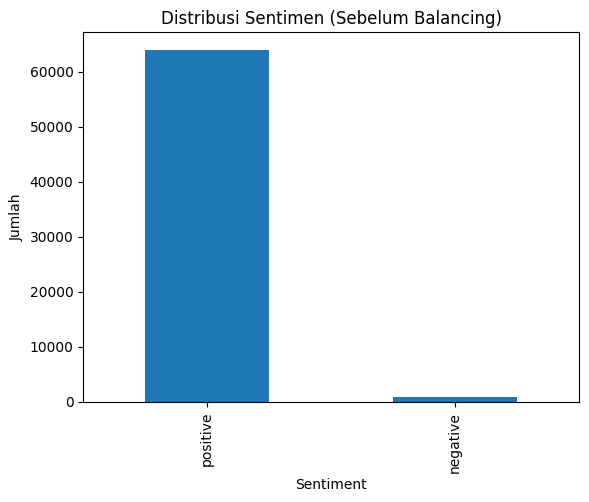

In [35]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribusi Sentimen (Sebelum Balancing)")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah")
plt.show()

In [41]:
display(Markdown("# BAR CHART VISUAL (BALANCED DATASET)"))

# BAR CHART VISUAL (BALANCED DATASET)

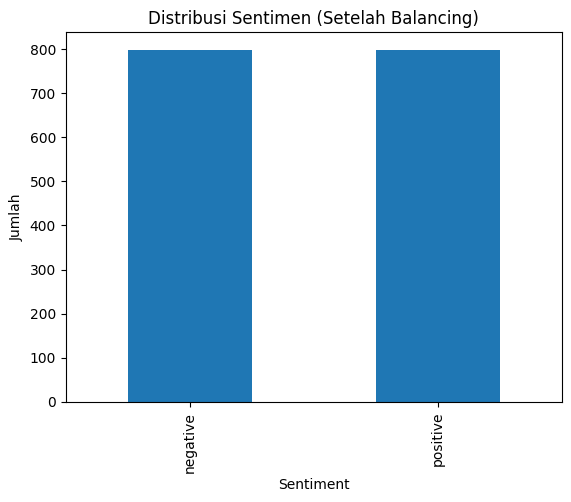

In [36]:
df_balanced['sentiment'].value_counts().plot(kind='bar')
plt.title("Distribusi Sentimen (Setelah Balancing)")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah")
plt.show()

In [42]:
display(Markdown("# CONFUSION MATRIX"))

# CONFUSION MATRIX

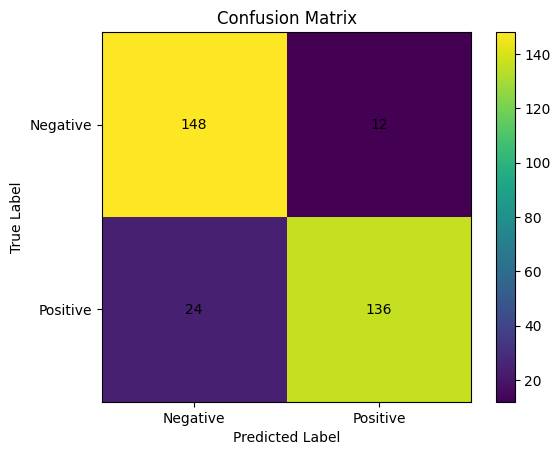

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0,1], ['Negative', 'Positive'])
plt.yticks([0,1], ['Negative', 'Positive'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

In [44]:
display(Markdown("# MOST INFLUENTIAL WORDS CHART"))

# MOST INFLUENTIAL WORDS CHART

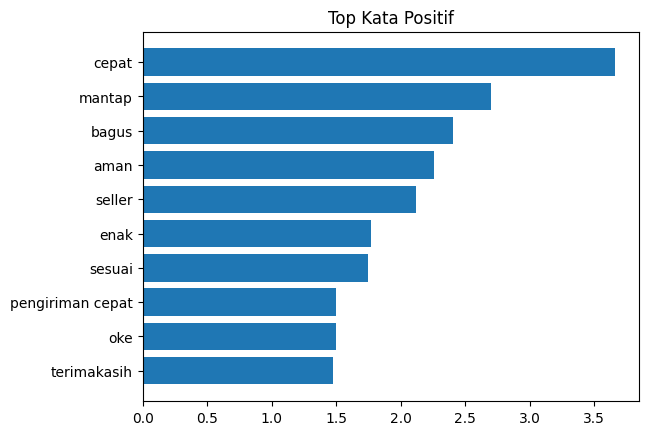

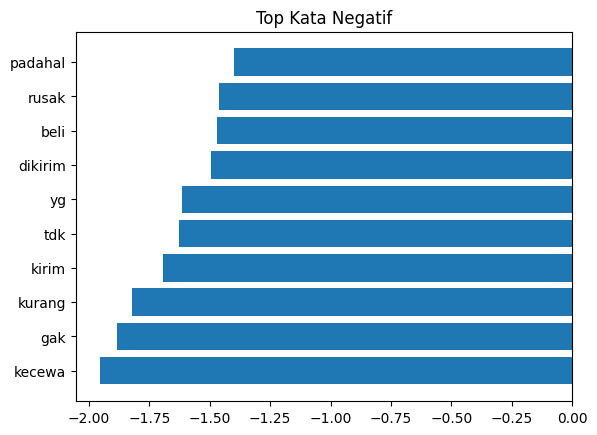

In [38]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coef = model.coef_[0]

top_positive = np.argsort(coef)[-10:]
top_negative = np.argsort(coef)[:10]

plt.barh(feature_names[top_positive], coef[top_positive])
plt.title("Top Kata Positif")
plt.show()

plt.barh(feature_names[top_negative], coef[top_negative])
plt.title("Top Kata Negatif")
plt.show()
